In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:
import pandas as pd
import datetime
import glob
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

### ACCIDENTS/AUX CSV FILE

In [0]:
columnCount = {}
df = []
for year in range(2000, 2019):
  try:
    datf = pd.read_csv('/content/drive/My Drive/Big-Data/Project/FARS/FARS' + str(year) + 'NationalCSV/ACCIDENT.csv', index_col=0)
    print(datf.shape)
    for col in datf.columns:
      if col in columnCount:
        columnCount[col] += 1
      else:
        columnCount[col] = 1
    df.append(datf)
  except:
    print(year)

In [0]:
keep = ['ARR_HOUR','ARR_MIN', 'CF1','CF2','CF3', 'ST_CASE', 'CITY','HOUR', 'MINUTE',
 'COUNTY','DAY','DAY_WEEK','DRUNK_DR','FATALS','HARM_EV','HOSP_HR','MONTH','PROFILE',
 'PEDS','PERSONS','REL_ROAD','ROUTE','SCH_BUS','STATE','WEATHER','YEAR', 'VE_TOTAL']

In [0]:
overalldf = pd.DataFrame(pd.concat(df))

In [0]:
overalldf_ = overalldf[keep] 

In [0]:
overalldf_.to_csv('/content/drive/My Drive/Big-Data/Project/FARS/Processed/accidents_merged_cleaned.csv')

In [0]:
aux_df = pd.DataFrame(pd.concat(df))

In [0]:
keep = ['YEAR', 'ST_CASE','A_CRAINJ',
'A_REGION','A_RU','A_INTER','A_RELRD','A_INTSEC','A_ROADFC','A_JUNC','A_MANCOL','A_RD','A_TOD','A_DOW',
'A_HR','A_CT','A_LT','A_MC','A_SPCRA','A_PED','A_PEDAL','A_ROLL','A_POLPUR',
'A_POSBAC','A_D15_19','A_D16_19','A_D15_20','A_D16_20','A_D65PLS','A_D21_24','A_D16_24','A_DIST','A_DROWSY','BIA']

In [0]:
aux_df.to_csv('/content/drive/My Drive/Big-Data/Project/FARS/Processed/accidents_aux_merged.csv')

In [0]:
aux_df = aux_df[keep] 

In [0]:
aux_df.to_csv('/content/drive/My Drive/Big-Data/Project/FARS/Processed/accidents_aux_merged_cleaned.csv')

In [0]:
aux_df['ID'] = aux_df.apply(lambda x: str(int(x['ST_CASE'])) + str(int(x['YEAR'])), axis=1)

In [0]:
del aux_df['YEAR']
del aux_df['ST_CASE']

In [0]:
aux_df = pd.read_csv('/content/drive/My Drive/Big-Data/Project/FARS/Processed/accidents_aux_merged_cleaned.csv')

## PERSON

In [0]:
columnCount = {}
df = []
for year in range(2000, 2019):
  try:
    datf = pd.read_csv('/content/drive/My Drive/Big-Data/Project/FARS/FARS' + str(year) + 'NationalCSV/PERSON.csv', encoding = 'unicode_escape')
    print(datf.shape)
    datf['ID'] = datf.apply(lambda x: str(int(x['ST_CASE'])) + str(year), axis=1)
    for col in datf.columns:
      if col in columnCount:
        columnCount[col] += 1
      else:
        columnCount[col] = 1
    df.append(datf)
  except:
    print(year)

In [0]:
features = list(concatdf.columns)
features.remove('FATALS')
features.remove('LOCATION')
features.remove('SEVERITY')
# Separating out the features
x = concatdf.loc[:, features].values
# Separating out the target
y = concatdf.loc[:,['SEVERITY']].values
# Standardizing the features
x_ = StandardScaler().fit_transform(x)

concatdf_mod = concatdf[features]

In [0]:
pca = PCA(n_components=57)
principalComponents = pca.fit_transform(x_)
principalDf = pd.DataFrame(data = principalComponents)
finalDf = pd.concat([principalDf, concatdf[['SEVERITY']]], axis = 1)

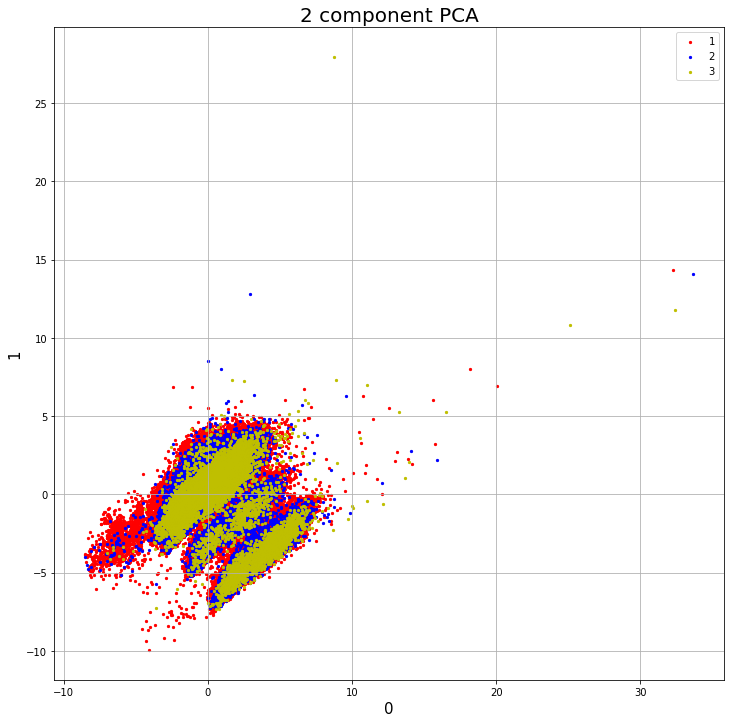

In [0]:
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('0', fontsize = 15)
ax.set_ylabel('1', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [1, 2, 3]
colors = ['r', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['SEVERITY'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 0]
               , finalDf.loc[indicesToKeep, 1]
               , c = color
               , s = 5)
ax.legend(targets)
ax.grid()

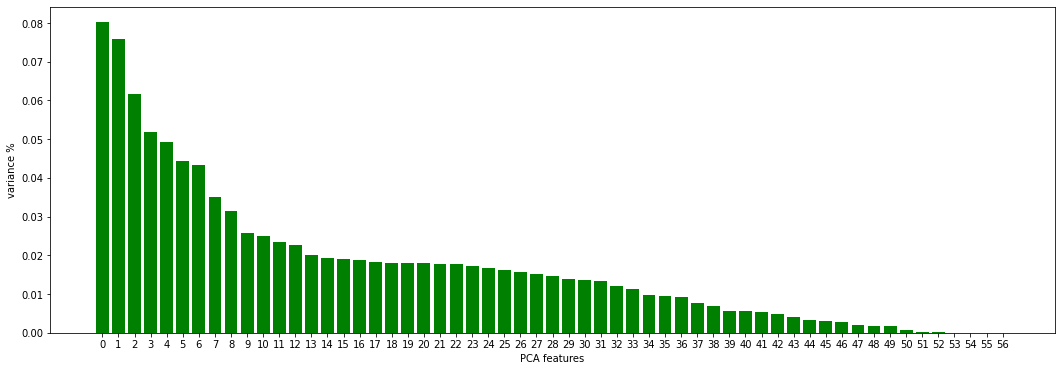

In [0]:
fig = plt.figure(figsize = (18,6))
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='green')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [0]:
pca.explained_variance_ratio_.cumsum()

In [0]:
loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), index=concatdf_mod.columns)
loadings

In [0]:
def square_sum(cols):
  output = 0.0
  for col in cols:
    output += col * col
  return np.sqrt(output)

loadings = pd.DataFrame(pca.components_.T * np.sqrt(pca.explained_variance_), index=concatdf_mod.columns)
loadings['significance'] = loadings.apply(square_sum, axis=1)
loadings.sort_values(by='significance', ascending=False)

## Using SFS - County Level

In [0]:
# from sklearn.preprocessing import StandardScaler
fx = ['COUNTY','STATE','FATALS', 'LOCATION', 'SEVERITY', 'ARR_HOUR', 'ARR_MIN','A_CRAINJ', 'SCH_BUS', 'CF1', 'CF2', 'CF3', 'CITY']
features = list(concatdf.columns)

for f in fx:
  features.remove(f)

x = lacounty.loc[:, features]
# # Separating out the target
y = lacounty.loc[:,['SEVERITY']]

In [0]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)

In [0]:
sfs1 = SFS(knn, 
           k_features=15, 
           forward=True,
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=5)

In [0]:
sfs1 = sfs1.fit(x.values, y.values)
sfs1.subsets_

## Add Response Time (Emergency Medical Service)

In [0]:
import pandas as pd
import datetime as dt
overalldf = pd.read_csv('/content/drive/My Drive/Big-Data/Project/FARS/Processed/cleaning_in_progress.csv', index_col=0)

In [0]:
def responseTime(ah, am, acch, accm):
  try:
    ah = int(ah)
    am = int(am)
    acch = int(acch)
    accm = int(accm)
  except:
    return

  if (ah >= 24) or (acch >= 24) or (am > 59) or (accm > 59):
    return
  
  today = dt.date.today()
  tmrw = dt.date.today() + dt.timedelta(days=1)
  d1 = dt.datetime(today.year, today.month, today.day, acch, accm)
  d2 = dt.datetime(today.year, today.month, today.day, ah, am)
  if ah < acch:
    d2 = dt.datetime(tmrw.year, tmrw.month, tmrw.day, ah, am)
  return (d2.timestamp() - d1.timestamp())/60

In [0]:
overalldf['responseTime'] = overalldf\
.apply(lambda x:responseTime(x['ARR_HOUR'],x['ARR_MIN'],x['HOUR'],x['MINUTE']), axis=1)

In [0]:
overalldf['responseTime'] = overalldf.apply(lambda x: abs(x['responseTime']) if x['responseTime'] < 0 else x['responseTime'],axis=1)

In [0]:
overalldf.to_csv('/content/drive/My Drive/Big-Data/Project/FARS/Processed/cleaning_in_progress.csv')